## 부분집합을 이용해 변수 간의 논리적 불일치 찾기
- 변수 간의 논리적 관계와 관련된 궁금증들을 쉽게 풀 수 있다.

In [5]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns',None)

nls97=pd.read_csv('C:/data-cleansing-main/Chapter04/data/nls97.csv')
nls97.set_index('personid',inplace=True)
nls97

,gender,birthmonth,birthyear,highestgradecompleted,maritalstatus,childathome,childnotathome,wageincome,weeklyhrscomputer,weeklyhrstv,nightlyhrssleep,satverbal,satmath,gpaoverall,gpaenglish,gpamath,gpascience,highestdegree,govprovidejobs,govpricecontrols,govhealthcare,govelderliving,govindhelp,govunemp,govincomediff,govcollegefinance,govdecenthousing,govprotectenvironment,weeksworked00,weeksworked01,weeksworked02,weeksworked03,weeksworked04,weeksworked05,weeksworked06,weeksworked07,weeksworked08,weeksworked09,weeksworked10,weeksworked11,weeksworked12,weeksworked13,weeksworked14,weeksworked15,weeksworked16,weeksworked17,colenrfeb97,colenroct97,colenrfeb98,colenroct98,colenrfeb99,colenroct99,colenrfeb00,colenroct00,colenrfeb01,colenroct01,colenrfeb02,colenroct02,colenrfeb03,colenroct03,colenrfeb04,colenroct04,colenrfeb05,colenroct05,colenrfeb06,colenroct06,colenrfeb07,colenroct07,colenrfeb08,colenroct08,colenrfeb09,colenroct09,colenrfeb10,colenroct10,colenrfeb11,colenroct11,colenrfeb12,colenroct12,colenrfeb13,colenroct13,colenrfeb14,colenroct14,colenrfeb15,colenroct15,colenrfeb16,colenroct16,colenrfeb17,colenroct17
personid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100061,Female,5,1980,13.0,Married,4.0,0.0,12500.0,10 hours or more a week,11 to 20 hours a week,6.0,NaN,NaN,306.0,350.0,280.0,315.0,2. High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0,52.0,52.0,48.0,52.0,53.0,52.0,52.0,39.0,40.0,52.0,53.0,40.0,52.0,52.0,52.0,48.0,48.0,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,3. 4-year college,3. 4-year college,3. 4-year college,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled
100139,Male,9,1983,12.0,Married,2.0,0.0,120000.0,1 to 3 hours a week,3 to 10 hours a week,8.0,NaN,NaN,NaN,NaN,NaN,NaN,2. High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,49.0,52.0,52.0,52.0,53.0,52.0,52.0,52.0,52.0,52.0,53.0,52.0,52.0,52.0,52.0,53.0,52.0,NaN,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled
100284,Male,11,1984,7.0,Never-married,1.0,0.0,58000.0,None,11 to 20 hours a week,7.0,NaN,NaN,NaN,NaN,NaN,NaN,0. None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,8.0,52.0,35.0,40.0,41.0,52.0,52.0,52.0,18.0,14.0,0.0,0.0,NaN,11.0,52.0,47.0,0.0,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled

In [7]:
nls97[['wageincome','highestgradecompleted','highestdegree']].head(3).T             # 데이터 살펴보기
nls97.loc[:, "weeksworked12":"weeksworked17"].head(3).T
nls97.loc[:, "colenroct09":"colenrfeb14"].head(3).T

personid,100061,100139,100284
colenroct09,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb10,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct10,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb11,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct11,3. 4-year college,1. Not enrolled,1. Not enrolled
colenrfeb12,3. 4-year college,1. Not enrolled,1. Not enrolled
colenroct12,3. 4-year college,1. Not enrolled,1. Not enrolled
colenrfeb13,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct13,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb14,1. Not enrolled,1. Not enrolled,1. Not enrolled


In [8]:
# 임금소득은 있지만 근무 주 수가 없는 사람
nls97.loc[(nls97.weeksworked16==0) & (nls97.wageincome>0),['weeksworked16','wageincome']]

,weeksworked16,wageincome
personid,,
102625,0.0,1200.0
109403,0.0,5000.0
118704,0.0,25000.0
130701,0.0,12000.0
131151,0.0,65000.0
...,...,...
957344,0.0,90000.0
966697,0.0,65000.0
969334,0.0,5000.0


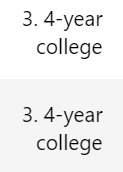

In [14]:
# 4년제 대학에 등록한 적이 있는 사람 -> 복잡..
nls97.filter(like='colenr').apply(lambda x:x.str[0:1]=='3').any(axis=1).head()      # any: 이전 단계에서 반환된 값에 True가 있었는지 검사


personid
100061     True
100139    False
100284    False
100292     True
100583     True
dtype: bool

In [16]:
# 대학원에 등록했지만 학사 과정 등록 데이터는 없는 사람
nobach=nls97.loc[nls97.filter(like='colenr').apply(lambda x:x.str[0:1]=='4').any(axis=1)
                 &
                 ~nls97.filter(like='colenr').apply(lambda x:x.str[0:1]=='3').any(axis=1),          # ~는 부정
                 'colenrfeb97':'colenrfeb17']

len(nobach)

22

In [17]:
nobach.head(3).T

personid,153051,154535,184721
colenrfeb97,NaN,NaN,NaN
colenroct97,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb98,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct98,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb99,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct99,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb00,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct00,2. 2-year college,1. Not enrolled,1. Not enrolled
colenrfeb01,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct01,2. 2-year college,1. Not enrolled,1. Not enrolled


In [18]:
# 학사 학위 이상을 가졌지만 4년제 대학에 등록한 기록이 없는 사람
nls97.highestdegree.value_counts(sort=False)

2. High School     3667
0. None             953
4. Bachelors       1673
3. Associates       737
5. Masters          603
1. GED             1146
7. Professional     120
6. PhD               54
Name: highestdegree, dtype: int64

In [19]:
no4yearenrollment = nls97.loc[nls97.highestdegree.str[0:1].isin(['4','5','6','7']) & ~nls97.filter(like="colenr").apply(lambda x: x.str[0:1]=='3').\
  any(axis=1), "colenrfeb97":"colenroct17"]
len(no4yearenrollment)

39

In [25]:
# 임금소득이 높은 사람
highwages=nls97.loc[nls97.wageincome > nls97.wageincome.mean() + (nls97.wageincome.std()*3),['wageincome']]     # 평균 임금보다 3표준편차 높은 것
highwages

,wageincome
personid,
131858,235884.0
133619,235884.0
151863,235884.0
164058,235884.0
164897,235884.0
...,...
964406,235884.0
966024,235884.0
976141,235884.0


In [26]:
# 최근 연도에 근무 주 수의 변동이 큰 개인
workchanges = nls97.loc[~nls97.loc[:,"weeksworked12":"weeksworked16"].mean(axis=1).between(nls97.weeksworked17*0.5,nls97.weeksworked17*2) \
  & ~nls97.weeksworked17.isnull(),"weeksworked12":"weeksworked17"]
len(workchanges)
workchanges.head(7).T

personid,100284,101526,101718,101724,102228,102454,102625
weeksworked12,0.0,0.0,52.0,52.0,52.0,52.0,14.0
weeksworked13,NaN,0.0,9.0,52.0,52.0,52.0,3.0
weeksworked14,11.0,0.0,0.0,52.0,17.0,7.0,52.0
weeksworked15,52.0,0.0,32.0,17.0,0.0,0.0,44.0
weeksworked16,47.0,0.0,0.0,0.0,0.0,0.0,0.0
weeksworked17,0.0,45.0,0.0,17.0,0.0,0.0,0.0


In [29]:
# 이수 학년과 최종 학력 간의 불일치
ltgrade12 = nls97.loc[nls97.highestgradecompleted<12, ['highestgradecompleted','highestdegree']] # 미국에서 12학년을 이수하지 못한 사람이 고등학교를 졸업하는 것은 드문 일
pd.crosstab(ltgrade12.highestgradecompleted,ltgrade12.highestdegree)

highestdegree,0. None,1. GED,2. High School
highestgradecompleted,,,
5.0,0,0,1
6.0,11,5,0
7.0,24,6,1
8.0,113,78,7
9.0,112,169,8
10.0,111,204,13
11.0,120,200,41
